In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

# CONF = Config().data[0]
# CRYPTOCURRENCY = CONF['CRYPTOCURRENCY']
# CRYPTOCURRENCY = list(CRYPTOCURRENCY.keys())
# NASDAQ100 = CONF['NASDAQ100']
# HS300 = list(ts.get_hs300s()['code'])

BENCHMARK = '163407'
TARGET = ['163407']
# TARGET = HS300

# ALL_TARGET = TARGET[:]

# pd

In [2]:
df = pd.read_csv('../database/20190208-170136.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])

df2 = pd.read_csv('../database/20190209-121828.csv')
len(df2)
df2 = df2.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])

400

400

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# df = pd.read_csv('../database/2014-2018-TT-PARAMTEST-MA-ALLRANDOM.csv')
# df = pd.read_csv('../database/20181031-112659.csv')
# df = pd.read_csv('../database/2013-2018-ZZ500-TT-PARAMTEST.csv')
# df = pd.read_csv('../database/2013-2018-ZZ500-MA-PARAMTEST.csv')
df = pd.read_csv('../database/20190208-170136.csv')
# df = pd.read_csv('../database/20181118-074036.csv')

df.columns
# df.head(2)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN', 'MAXDROPDOWN', 'BENCHMARK_RETURN']]
# df

# d_df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
# d_df

# df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).mean().reset_index()
# df.columns
# df


X = df['ROLLMAX']
Y = df['ROLLMIN']
Z = df['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='o')
# ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2, hatch='', linestyle='dashdot')
# X, Y, Z = axes3d.get_test_data(0.05)
# X
# Z
# ax.plot_wireframe(X, Y, Z)

md = Z.median()
md = Z.mean()
md = Z.describe(percentiles=[.75, .90, .95])['95%']
# .norm.interval(0.96,mean,std)

df_d = df.loc[df['RETURN'] >= md]
df_d

X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='r', marker='o')
ax.bar(X, Z, zs=Y, zdir='y', color='r', alpha=0.4)

df_d = df.loc[(df['RETURN'] < md) & (df['RETURN'] > 0)]
X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='^')
# ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2)

ax.set_xlabel('X ROLLMAX')
ax.set_ylabel('Y ROLLMIN')
ax.set_zlabel('Z RETURN')

# ax.set_yticks(Y)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN']]
# df[df['TURTLE_POS'] == 10]

In [ ]:
df['RETURN_HS300'] = df2['RETURN']
# df.head()

# df.sort_values()
df = df[(df.RETURN > 0.6) & (df.RETURN_HS300 > 0.3)]
# df = df.sort_values(by='RETURN', ascending=False)
df

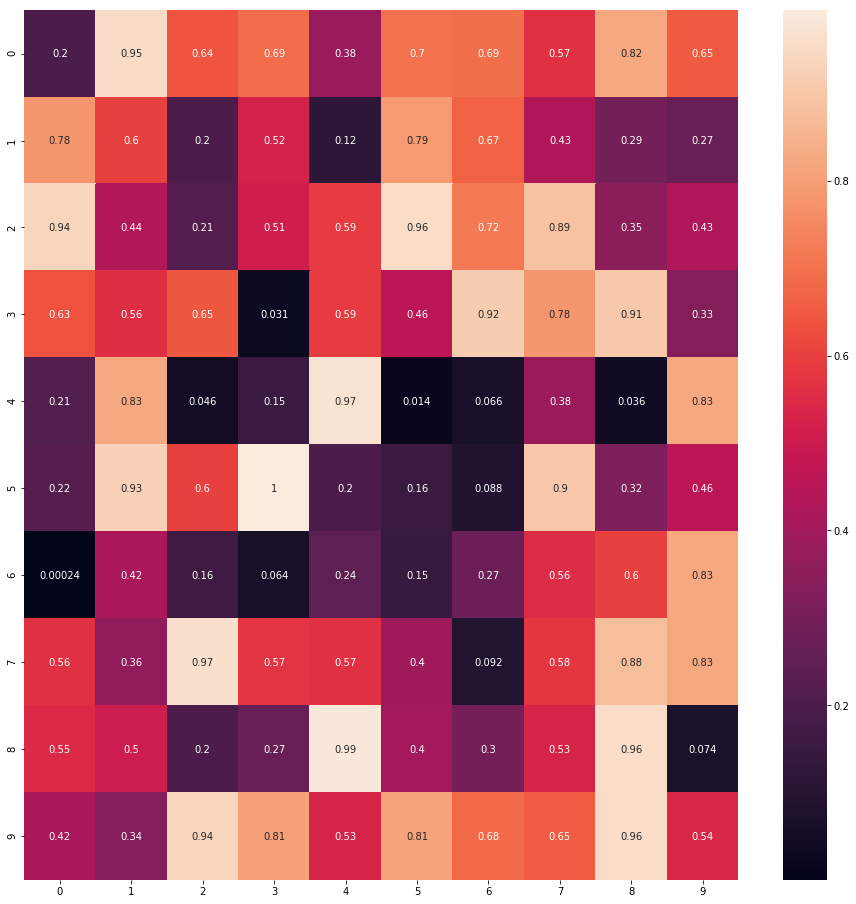

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

heat_df = pd.DataFrame(abs(np.random.randn(400, 400)), index=index, columns=columns)
# heat_df
# ax = sns.heatmap(heat_df, annot=True)

uniform_data = np.random.rand(10, 10)
ax = sns.heatmap(uniform_data, annot=True)